<a href="https://colab.research.google.com/github/ankitaroy30/Books-Python/blob/main/NYCity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

palette = sns.color_palette("rainbow", 8)


import warnings
warnings.filterwarnings("ignore")



In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')

In [7]:
df.shape

(50000, 8)

In [8]:
df.head(10).style.set_properties(**{'background-color': '#ffe100','color': '#000','border': '1px solid #000000'})

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.100000,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.500000,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.500000,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.000000,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.900000,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [11]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [13]:
rn_sample_df = df.sample(10000)

In [16]:
rn_sample_df['date_time_of_pickup'] = pd.to_datetime(rn_sample_df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")

# 2009-06-15 17:26:21 UTC
# add time information
rn_sample_df['year'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.year)
rn_sample_df['weekday'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.weekday())
rn_sample_df['hour'] = rn_sample_df.date_time_of_pickup.apply(lambda t: t.hour)

In [17]:
def distance(lat1, lon1, lat2, lon2):
    
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

In [19]:
rn_sample_df['distance'] = distance(rn_sample_df.latitude_of_pickup, rn_sample_df.longitude_of_pickup, 
                                    rn_sample_df.latitude_of_dropoff, rn_sample_df.longitude_of_dropoff)

In [20]:
rn_sample_df = rn_sample_df.dropna()

In [22]:
rn_sample_df = rn_sample_df[rn_sample_df.amount > 0]

In [23]:
rn_sample_df = rn_sample_df[rn_sample_df.distance > 0]

In [25]:
# now removing the unique_id and date_time_of_pickup coloumn from the dataset
rn_sample_df = rn_sample_df.drop(['unique_id', 'date_time_of_pickup'], axis=1)

In [26]:
rn_sample_df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,weekday,hour,distance
29553,7.3,-73.982682,40.750907,-73.992305,40.748446,1,2010,4,13,0.531623
5708,7.0,-73.985515,40.759227,-73.974852,40.758697,1,2013,1,17,0.559255
30746,5.3,-74.312932,40.919507,-74.308235,40.919385,2,2010,0,22,0.245371
30249,7.0,-73.986968,40.755767,-73.997810,40.754025,6,2014,4,9,0.580082
4025,7.5,-74.004379,40.747765,-73.993904,40.732769,1,2015,3,2,1.172267


In [27]:
tPickup_fig = px.scatter_mapbox(rn_sample_df, lat='latitude_of_pickup', lon='longitude_of_pickup', hover_name='amount', hover_data=['amount'],
    color='amount',color_continuous_scale=px.colors.sequential.Agsunset, opacity=.05,
    center={'lat': 40.75, 'lon': 286.051}, 
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tPickup_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tPickup_fig.show()

In [28]:
tDropoff_fig = px.scatter_mapbox(rn_sample_df, lat='latitude_of_dropoff', lon='longitude_of_dropoff', hover_name='amount', hover_data=['amount'],
    color='amount',color_continuous_scale=px.colors.sequential.Rainbow_r, opacity=0.1,
    center={'lat': 40.75, 'lon': 286.051},
    zoom=11,
    height=500,width=1180,
    mapbox_style="carto-positron", labels=None)
tDropoff_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}).update_coloraxes(showscale=False)
tDropoff_fig.show()

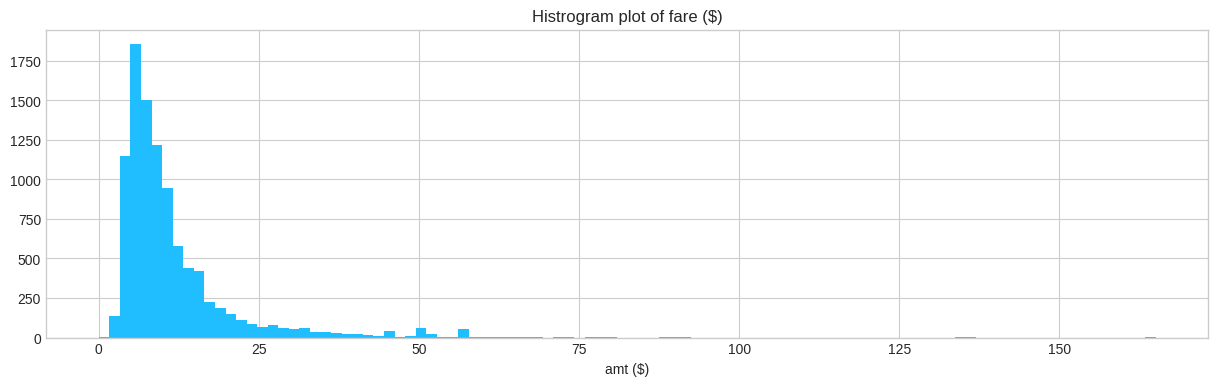

In [29]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 4))

plt.hist(rn_sample_df['amount'], bins=100, color='#20beff')
plt.xlabel("amt ($)")
plt.title("Histrogram plot of fare ($)")
plt.show()

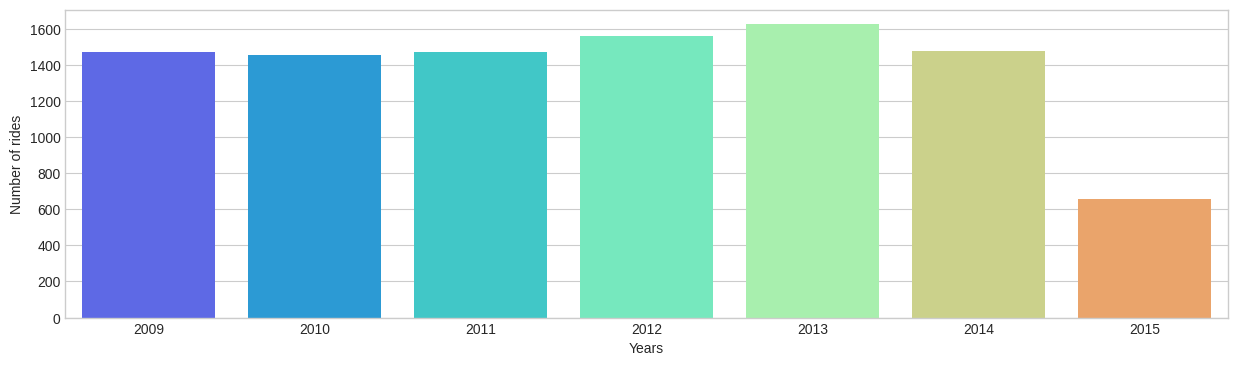

In [30]:
year_insight = rn_sample_df.year.value_counts()

plt.figure(figsize=(15, 4))
sns.barplot(data=rn_sample_df, x=year_insight.index, y=year_insight.values, palette=palette)
plt.ylabel("Number of rides")
plt.xlabel("Years")
plt.show()


In [31]:
year2012_insight = rn_sample_df[rn_sample_df['year'] == 2012]

In [33]:
xlim = [-74.03, -73.85]
ylim = [40.70, 40.85]

year2012_traffic_insight = year2012_insight.copy()
year2012_insight = year2012_insight[(year2012_insight.longitude_of_pickup > xlim[0]) & (year2012_insight.longitude_of_pickup < xlim[1])]
year2012_insight = year2012_insight[(year2012_insight.longitude_of_dropoff > xlim[0]) & (year2012_insight.longitude_of_dropoff < xlim[1])]
year2012_insight = year2012_insight[(year2012_insight.latitude_of_pickup > ylim[0]) & (year2012_insight.latitude_of_pickup < ylim[1])]
year2012_insight = year2012_insight[(year2012_insight.latitude_of_dropoff > ylim[0]) & (year2012_insight.latitude_of_dropoff < ylim[1])]

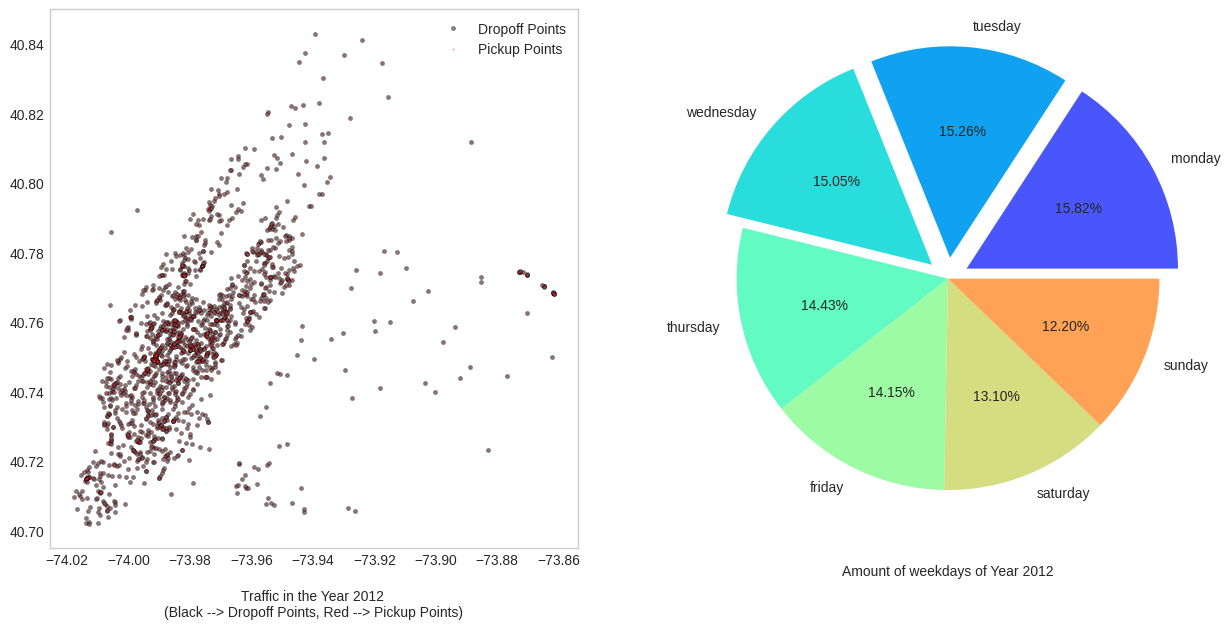

In [34]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)
plt.plot(year2012_insight.longitude_of_dropoff, year2012_insight.latitude_of_dropoff, 'o', alpha = .5, markersize = 2, color="#fff", markeredgecolor='#000', markeredgewidth=1.5)
plt.plot(year2012_insight.longitude_of_dropoff, year2012_insight.latitude_of_dropoff, '.', alpha = .8, markersize = .5, color="red")
plt.legend(['Dropoff Points', "Pickup Points"])
plt.xlabel("\nTraffic in the Year 2012 \n(Black --> Dropoff Points, Red --> Pickup Points)")
plt.grid(False)

plt.subplot(1, 2, 2)
days_list = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
weeklyTraffic = year2012_insight['weekday'].value_counts()
plt.pie(weeklyTraffic.values, labels=days_list, autopct="%.2f%%", explode=[0.1, 0.1, 0.1, 0, 0, 0, 0], colors=palette)
plt.xlabel("\nAmount of weekdays of Year 2012")
plt.show()

In [35]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

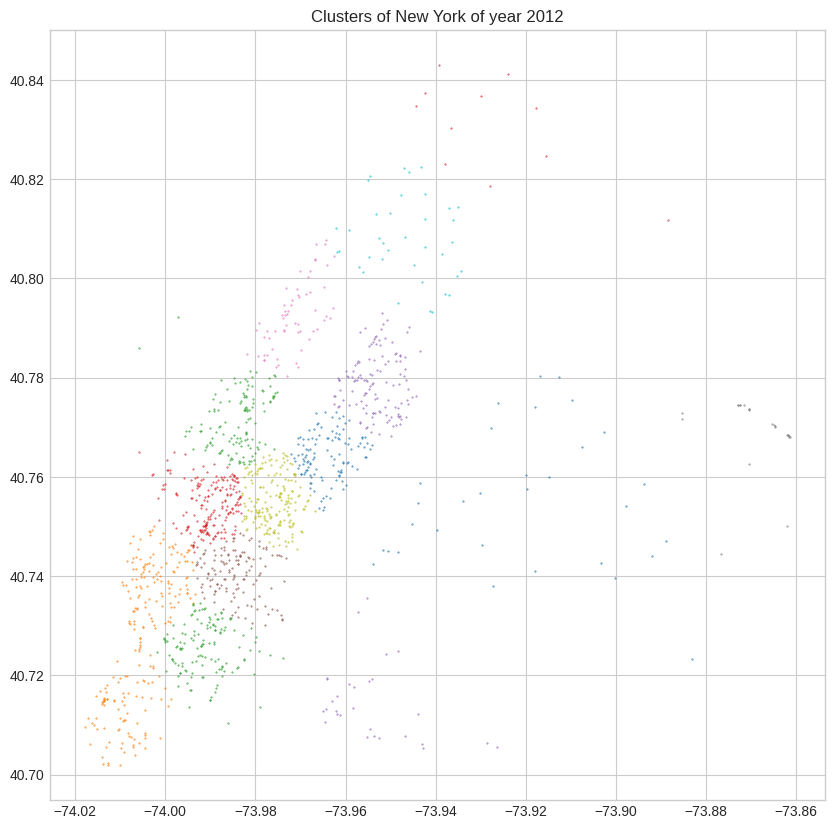

In [36]:
loc_df = pd.DataFrame()
loc_df['longitude'] = year2012_insight.longitude_of_dropoff
loc_df['latitude'] = year2012_insight.latitude_of_dropoff


kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_

plt.figure(figsize = (10, 10))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 1, markersize = 0.8)

plt.title('Clusters of New York of year 2012')
plt.show()

In [47]:
def visualize_peakDaysF(day, color='r'):
    year2012_monday_insight = year2012_insight[year2012_insight["weekday"] == day]
    day_name = list(days_list.keys())[day]
    plt.figure(figsize = (15, 70))
    
    max_pickup, max_pgcnt = 0, 0
    
    for hrs in range(24):
        specDay_traffic = year2012_monday_insight[year2012_monday_insight['hour'] == hrs]
        pickup = len(specDay_traffic)
        pgn_cnt = specDay_traffic["no_of_passenger"].sum()
        
        
        max_pickup = max(max_pickup, pickup)
        max_pgcnt = max(max_pgcnt, pgn_cnt)


        longitude = list(specDay_traffic.longitude_of_pickup) + list(specDay_traffic.longitude_of_dropoff)
        latitude = list(specDay_traffic.latitude_of_pickup) + list(specDay_traffic.latitude_of_dropoff)
        plt.subplot(24, 6, hrs+1)

        plt.title("\nHour: " + str(hrs) + " [pickup="+ str(pickup)+",\nno_of_passenger="+ str(pgn_cnt)+"] ", fontsize=12)

        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.plot(longitude,latitude,'.', alpha = 0.6, markersize = 10, color=color)

#         break
    plt.suptitle("\n"+ day_name.capitalize() +" (max pickups=" + str(max_pickup) + ", max passengers=" + str(max_pgcnt) + ")\n\n\n\n\n\n", fontsize=20)
    plt.tight_layout()
    plt.show()

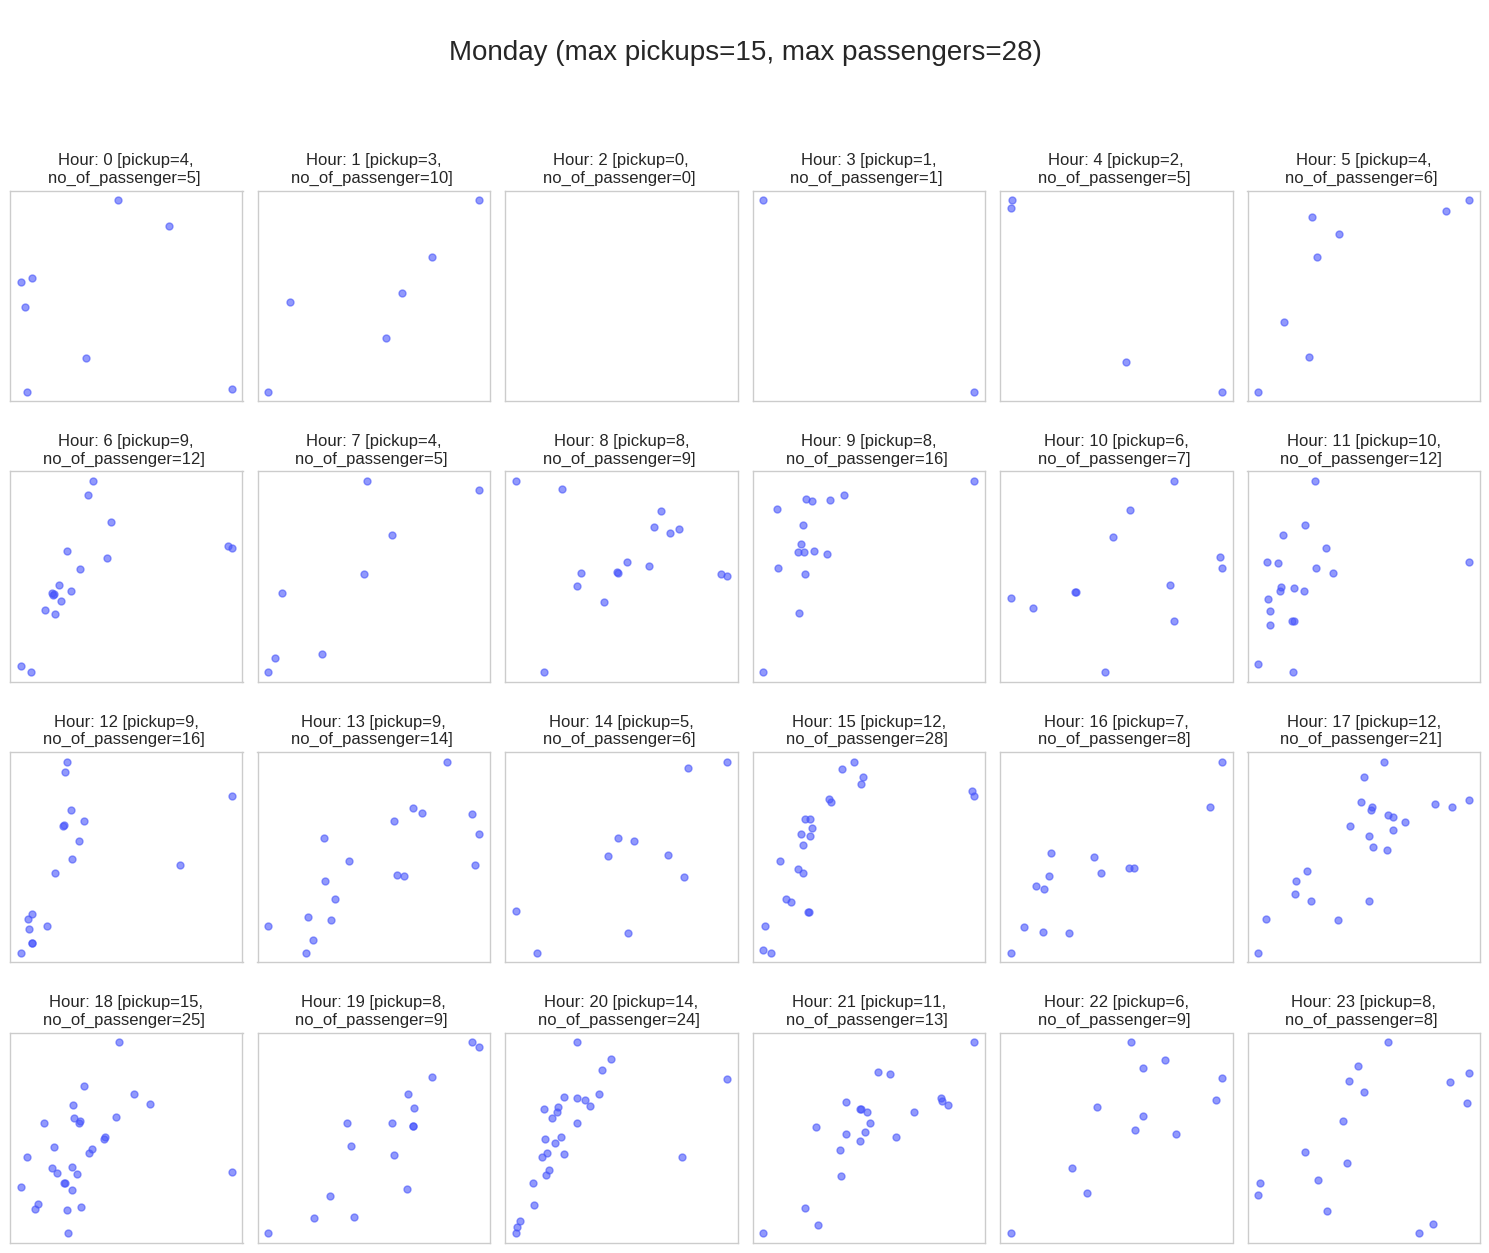

In [48]:
visualize_peakDaysF(0, color='#4856fb')

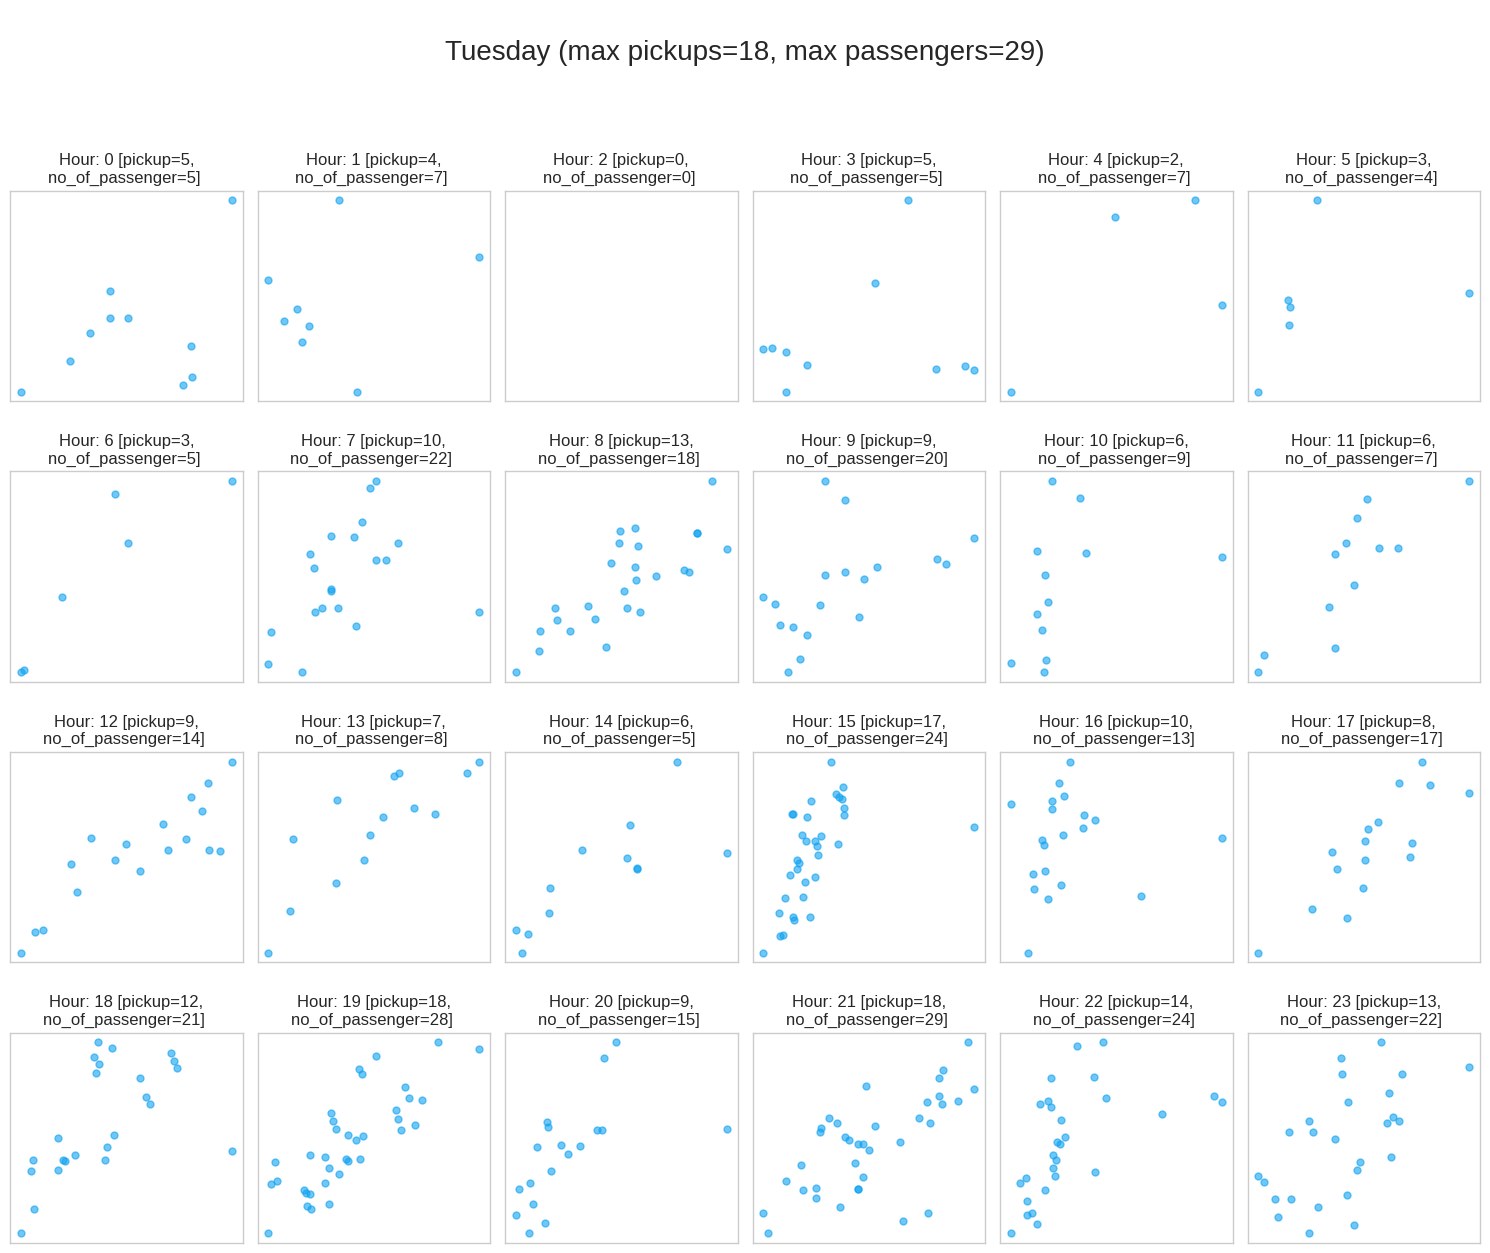

In [49]:
visualize_peakDaysF(1, color='#10a2f0')

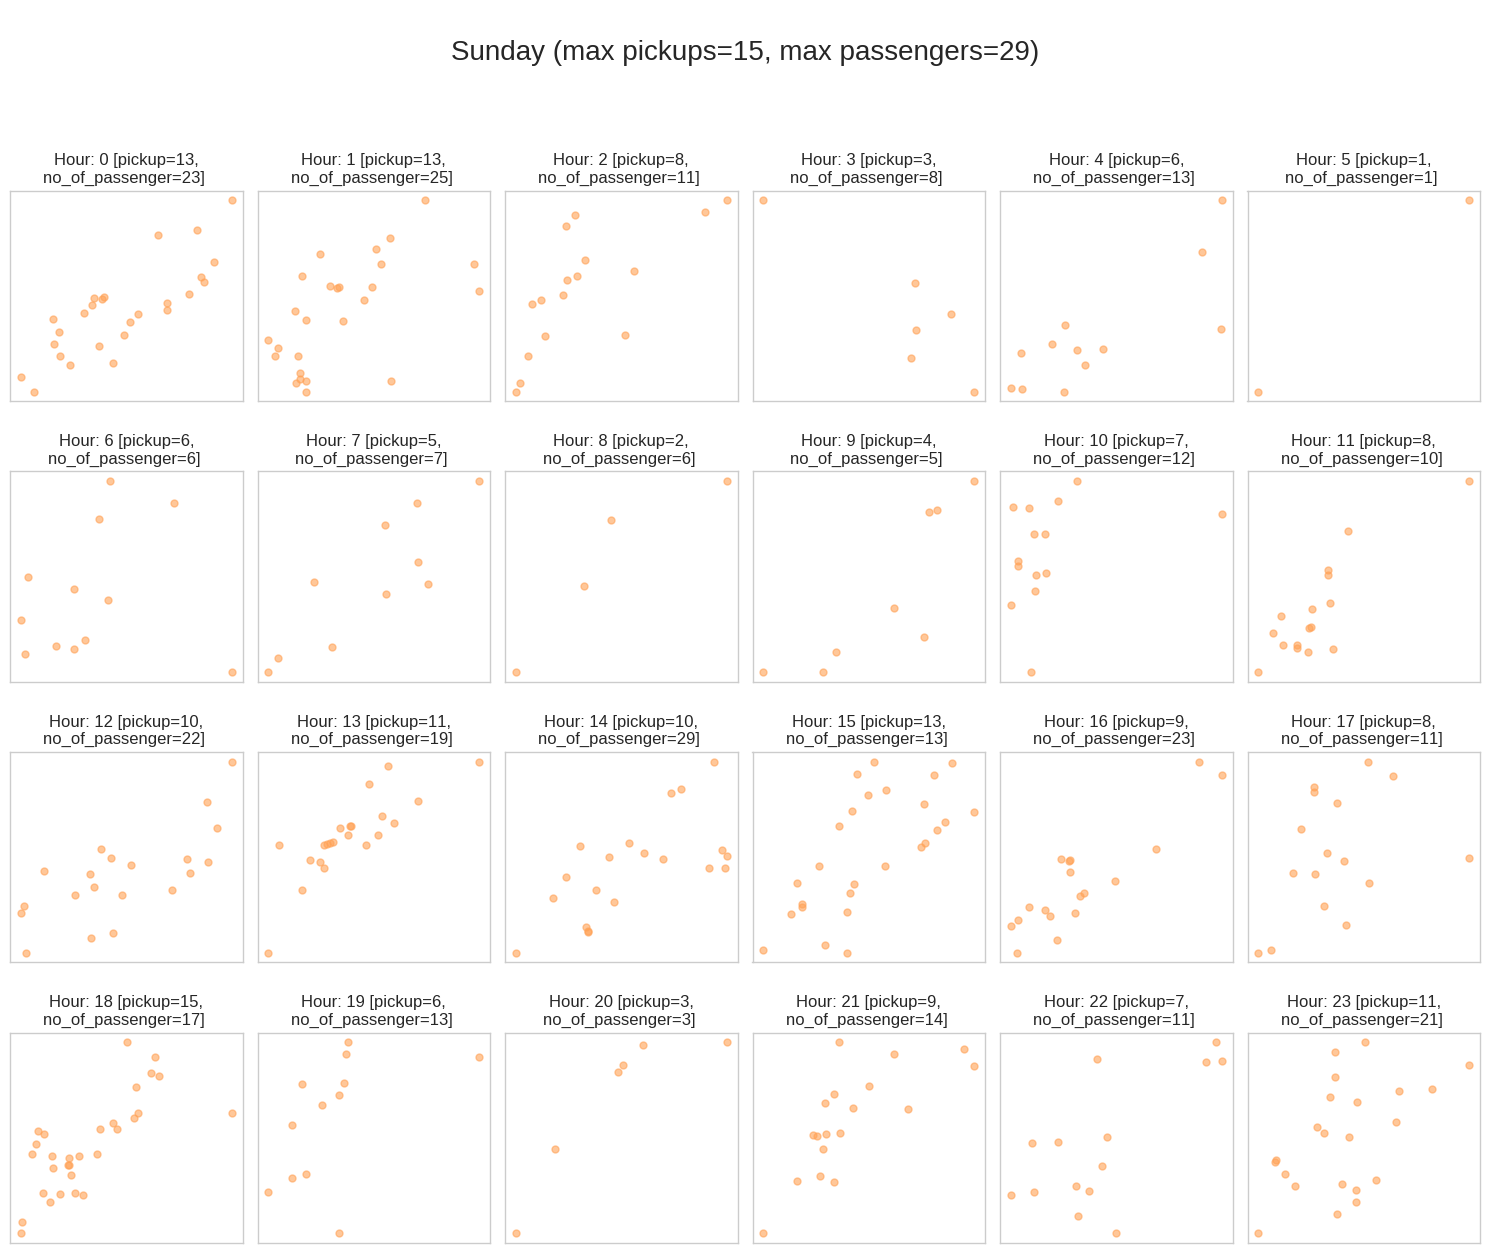

In [50]:
visualize_peakDaysF(6, color='#ffa256')

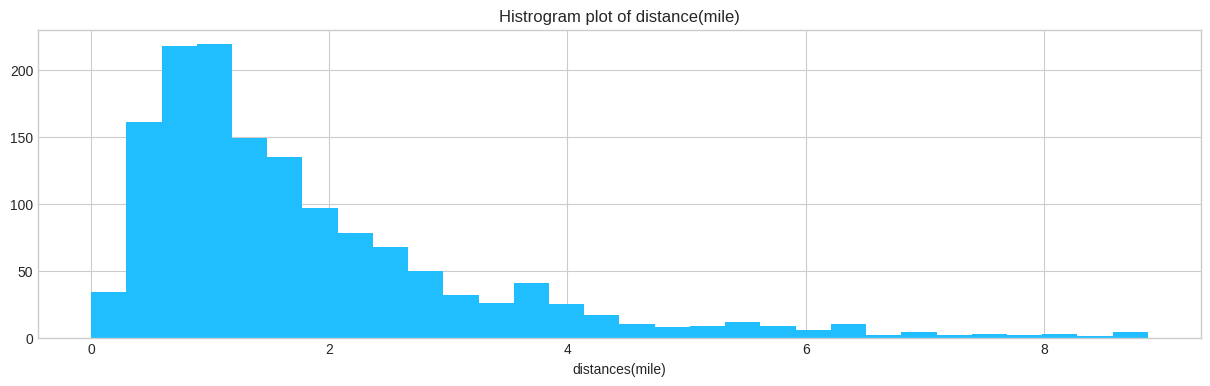

In [51]:
year2012_insight.distance.hist(bins=30, figsize=(15,4), color='#20beff')
plt.xlabel("distances(mile)")
plt.title("Histrogram plot of distance(mile)")
plt.show()

In [52]:
year2012_insight.groupby('no_of_passenger')['distance', 'amount'].mean()

,distance,amount
no_of_passenger,,
0,0.894153,6.328571
1,1.801508,9.990287
2,1.729078,9.813107
3,1.955308,11.430645
4,2.061021,10.730769
5,1.890542,10.217895
6,1.310701,8.376667


In [53]:
print("Average $USD/Mile : {:0.2f}".format(year2012_insight.amount.sum()/year2012_insight.distance.sum()))

Average $USD/Mile : 5.58


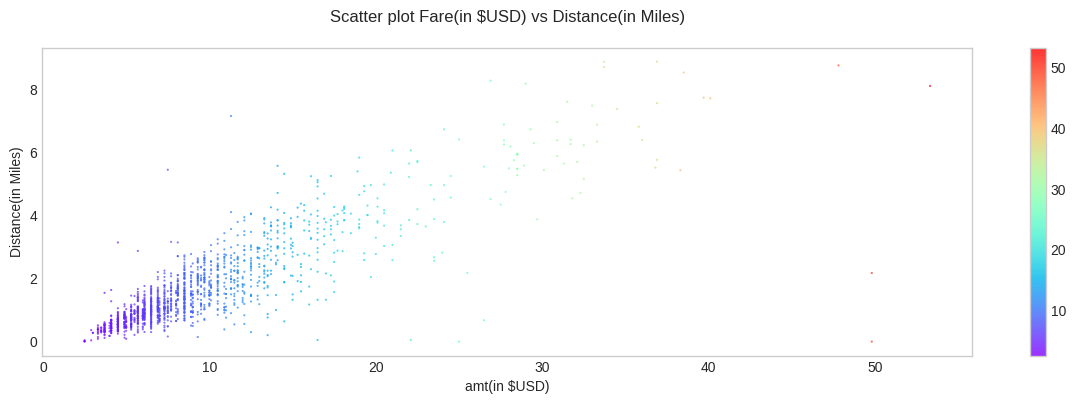

In [54]:
plt.figure(figsize=(15,4))

plt.scatter(year2012_insight.amount, year2012_insight.distance, c=year2012_insight.amount, 
            cmap=plt.cm.rainbow, alpha=0.8, s=1, marker=".")
plt.xlabel("amt(in $USD)")
plt.ylabel("Distance(in Miles)")
plt.title("Scatter plot Fare(in $USD) vs Distance(in Miles)\n")
ol = plt.grid(False)
plt.colorbar(ol)
plt.show()

In [56]:
# remove datapoints with distance < 0.05 miles

print("Old size: ", len(year2012_insight))
train_df = year2012_insight[year2012_insight.distance >= 0.05]

print("New size: ", len(train_df))

Old size:  1435
New size:  1428


In [58]:
model_data = train_df[['year', 'hour', 'distance', 'no_of_passenger', 'amount']]

In [60]:
model_data.head()

,year,hour,distance,no_of_passenger,amount
43865,2012,8,0.145316,2,9.3
24978,2012,12,3.556598,1,21.5
43938,2012,14,0.979906,0,7.7
12137,2012,21,0.930617,1,5.5
33694,2012,22,3.354685,1,13.3


In [61]:
X = model_data[['year', 'hour', 'distance', 'no_of_passenger']]
y = model_data[['amount']]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [65]:
from sklearn.metrics import r2_score

y_test_pred = model_lin.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 71.0%


In [66]:
import pickle
filename = 'LR_NYC_trainedM.sav'
pickle.dump(model_lin, open(filename, 'wb'))